   Unnamed: 0 RECORD_DATE          SOURCETYPE1  PRODUCT ADDITION
0           0  2025-02-04  b360.default.system                35
1           1  2025-02-03  b360.default.system                44
2           2  2025-02-02  b360.default.system                 9
3           3  2025-02-01  b360.default.system                26
4           4  2025-01-31  b360.default.system                 4
5           5  2025-01-30  b360.default.system                15


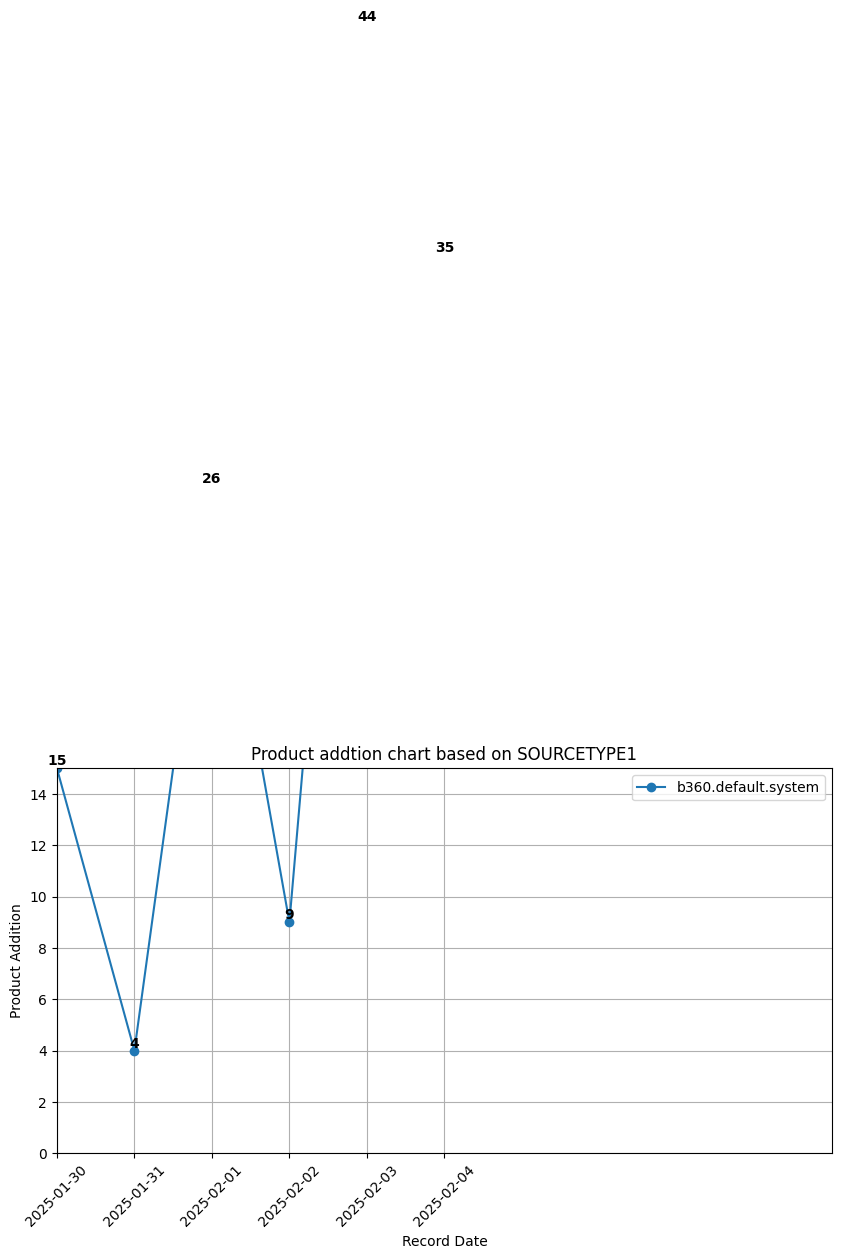

In [3]:
import pandas as pd, matplotlib.pyplot as plt
import os
csv_main_path = "./dashboard_chart_df_csv/"
if not os.path.exists(csv_main_path):
    os.makedirs(csv_main_path)

csv_path = csv_main_path+"product_addition_chart.csv"
df = pd.read_csv(csv_path)
print(df)
df = df.sort_values(by='RECORD_DATE')

each_data = df["SOURCETYPE1"].unique()
plt.figure(figsize=(10, 5))
plt.plot(df["RECORD_DATE"], df["PRODUCT ADDITION"], label=each_data, marker='o')
for x,y in zip(df["RECORD_DATE"], df["PRODUCT ADDITION"]):
    plt.text(x, y, str(y), fontsize=10, fontweight="bold", ha="center", va="bottom")



plt.xlabel("Record Date")

plt.ylabel("Product Addition")
plt.title("Product addtion chart based on SOURCETYPE1")
plt.legend()  # Add legend to differentiate lines
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Add grid

# image_path = image_main_path+"product_addition_chart.png"
# plt.savefig(image_path, bbox_inches="tight")  # Save with tight layout
# plt.close()

plt.show()

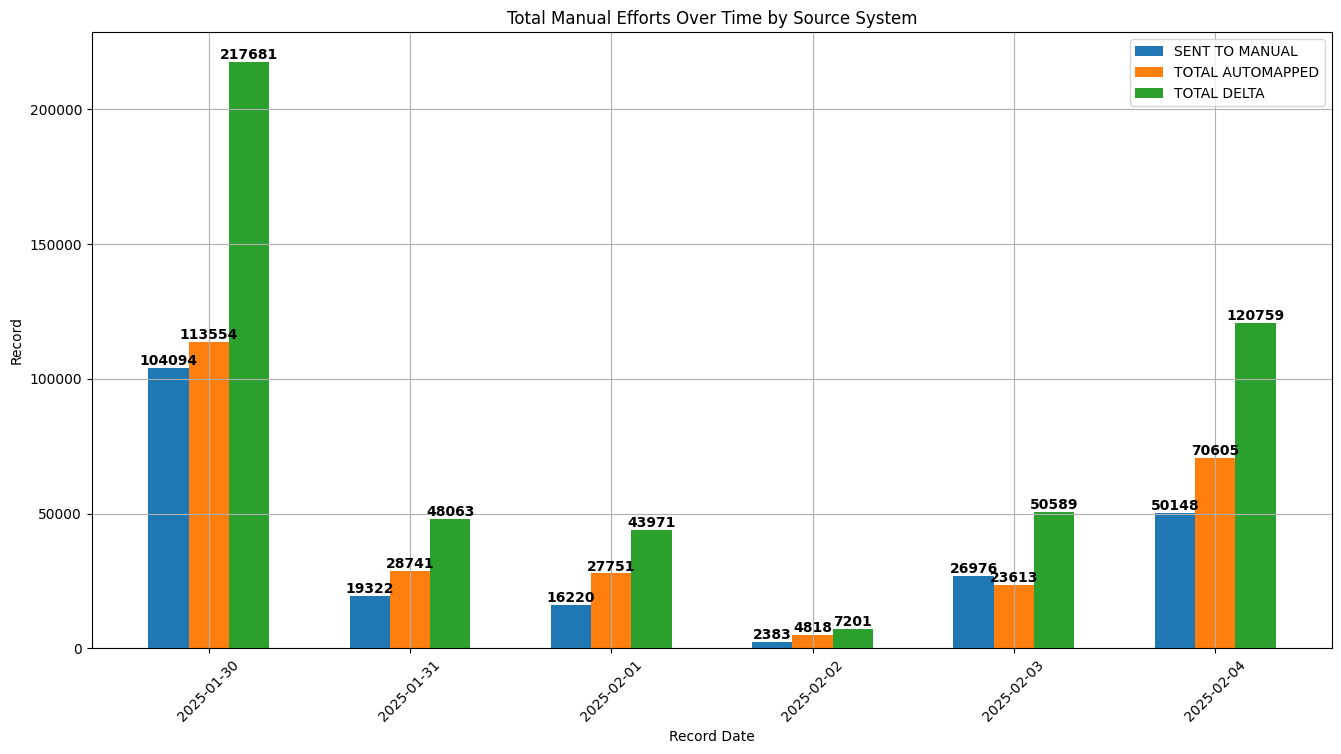

In [1]:
import pandas as pd, matplotlib.pyplot as plt
import os
csv_main_path = "./dashboard_chart_df_csv/"
if not os.path.exists(csv_main_path):
    os.makedirs(csv_main_path)

csv_path = csv_main_path+"Pharmretail.csv"
df = pd.read_csv(csv_path)
# print(df)

df = df.sort_values(by='RECORD_DATE')
each_data_date = df["RECORD_DATE"].unique()
each_data = df.sort_values(by='PARAMETER')["PARAMETER"].unique()

# Dictionary to store the datasets
data_set_lists = {}
for i in each_data:
    filtered_df = df.loc[df["PARAMETER"] == i, ["RECORD_DATE", "RECORDS"]]
    data_set_lists[i] = filtered_df  # Store filtered data
    
# data_set_lists = dict(sorted(data_set_lists.items(), key=lambda x: x[0]))


import numpy as np
p=np.arange(len(data_set_lists[next(iter(data_set_lists))]))

# ---- [0 1 2] [np.float64(0.2), np.float64(1.2), np.float64(2.2)]

width=0.2
p1=[j+width for j in p]
new_list = [p, p1]

while len(new_list) != len(p1):
    new_list.append([round(j+width, 1) for j in new_list[-1]])

# print('----', new_list)
# print(data_set_lists)
plt.figure(figsize=(16, 8))
for index, (key, data) in enumerate(data_set_lists.items()):
    plt.bar(new_list[index], data["RECORDS"], width=width, label=key)  # Added dots    
    for x, y in zip(new_list[index], data["RECORDS"]):
            plt.text(x, y, str(y), fontsize=10, fontweight="bold", ha="center", va="bottom")

# Customize plot
plt.xlabel("Record Date")
plt.ylabel("Record")
plt.title("Total Manual Efforts Over Time by Source System")
plt.legend()  # Add legend to differentiate lines
plt.xticks(p+width,each_data_date,rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Add grid

# image_path = image_main_path+"Pharmretail.png"
# plt.savefig(image_path, bbox_inches="tight")  # Save with tight layout
# plt.close()
# Show the plot
plt.show()